In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd
from sklearn.decomposition import NMF
import random
import os
import shutil



In [2]:


def copy_random_pics(src_path, dest_path, num_pics, new_name_prefix):
    # Get list of all files in the source directory
    all_files = os.listdir(src_path)
    
    # Filter out only image files (assuming jpg and png for this example)
    image_files = [f for f in all_files if f.endswith('.jpg') or f.endswith('.png')]
    
    # Check if there are enough images to copy
    if len(image_files) < num_pics:
        raise ValueError(f"Not enough images in the source directory. Found {len(image_files)} images.")
        
    # Randomly select the specified number of images
    selected_images = random.sample(image_files, num_pics)

    # Create the destination directory if it doesn't exist
    os.makedirs(dest_path, exist_ok=True)

    # Copy the selected images to the destination directory with new names
    for i, image in enumerate(selected_images):
        new_name = f"{new_name_prefix}_{i+1}{os.path.splitext(image)[1]}"
        shutil.copy(os.path.join(src_path, image), os.path.join(dest_path, new_name))


In [3]:

copy_random_pics('came_horse/train/horse/', './test_images/', 5, 'horse')

In [4]:

copy_random_pics('cats_dogs/train/cat/', './test_images/', 5, 'cat')

In [5]:

copy_random_pics('cats_dogs/train/dog/', './test_images/', 5, 'dog')

In [6]:

copy_random_pics('sheep_goat/goat/', './test_images/', 5, 'goat')

In [7]:
all_files = os.listdir("./test_images/")

In [8]:
len(all_files)

20

In [9]:
from PIL import Image

def find_smallest_image_size(folder_path):
    min_width, min_height = float('inf'), float('inf')
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            with Image.open(os.path.join(folder_path, file_name)) as img:
                width, height = img.size
                if width < min_width:
                    min_width = width
                if height < min_height:
                    min_height = height
    return min_width, min_height

smallest_size = find_smallest_image_size('./test_images/')
print(f"The smallest image size is: {smallest_size}")

The smallest image size is: (200, 136)


In [10]:
from PIL import Image
import os

def resize_images(directory, new_size):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Check for image files
            filepath = os.path.join(directory, filename)
            with Image.open(filepath) as img:
                img_resized = img.resize(new_size)
                img_resized.save(filepath)

directory = "./test_images/"  
new_size = (200, 136)  

resize_images(directory, new_size)

In [ ]:
from PIL import Image
import numpy as np
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error

# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    with Image.open(image_path) as img:
        img = img.convert('L')  # Convert to grayscale
        img = img.resize(new_size)  # Resize to the new size
        img_array = np.array(img).flatten()  # Flatten the image
    return img_array

# Load and preprocess the images
horse_image = load_and_preprocess_image(os.path.join(directory, 'horse_1.png'))
goat_image = load_and_preprocess_image(os.path.join(directory, 'goat_4.jpg'))

# Combine the images into a single dataset
data = np.vstack([horse_image, goat_image])



Least squares difference between horse_1 and goat_4 images: 21271.833736484612


Least squares difference for 2 components between horse_1 and goat_4 images: 21271.833736484612
Least squares difference for 4 components between horse_1 and goat_4 images: 21272.290352615895
Least squares difference for 5 components between horse_1 and goat_4 images: 21273.06250224367
Least squares difference for 10 components between horse_1 and goat_4 images: 21271.860761784763
Least squares difference for 15 components between horse_1 and goat_4 images: 21273.142256212857


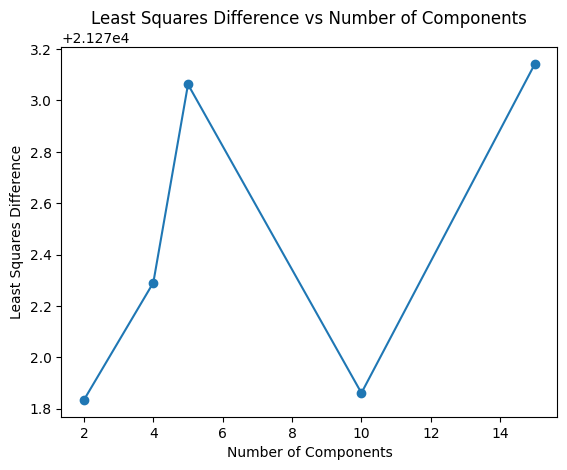

In [18]:
# Perform NMF
n_components_list = [2,4,5,10,15]
least_squares_diffs = []

for n_components in n_components_list:
    # Perform NMF
    nmf = NMF(n_components=n_components, init='random', random_state=0)
    W = nmf.fit_transform(data)
    H = nmf.components_

    # Reconstruct the images
    horse_reconstructed = np.dot(W[0, :], H)
    goat_reconstructed = np.dot(W[1, :], H)

    # Calculate the least squares difference
    least_squares_diff = mean_squared_error(horse_reconstructed, goat_reconstructed)
    
    print(f"Least squares difference for {n_components} components between horse_1 and goat_4 images: {least_squares_diff}")
    least_squares_diffs.append(least_squares_diff)

# Plot the results
plt.plot(n_components_list, least_squares_diffs, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Least Squares Difference')
plt.title('Least Squares Difference vs Number of Components')
plt.show()


In [ ]:
from itertools import combinations

# Function to calculate least squares difference between two images
def calculate_least_squares_diff(image1, image2, n_components):
    nmf = NMF(n_components=n_components, init='random', random_state=0)
    data = np.vstack([image1, image2])
    W = nmf.fit_transform(data)
    H = nmf.components_
    image1_reconstructed = np.dot(W[0, :], H)
    image2_reconstructed = np.dot(W[1, :], H)
    least_squares_diff = mean_squared_error(image1_reconstructed, image2_reconstructed)
    return least_squares_diff

# Load and preprocess all images
image_arrays = {}
for file_name in all_files:
    image_arrays[file_name] = load_and_preprocess_image(os.path.join(directory, file_name))

# Calculate least squares difference for all pairs of images
results = []
for (file1, file2) in combinations(all_files, 2):
    image1 = image_arrays[file1]
    image2 = image_arrays[file2]
    least_squares_diff = calculate_least_squares_diff(image1, image2, n_components)
    results.append((file1, file2, least_squares_diff))

# Print the results
for file1, file2, diff in results:
    print(f"Least squares difference between {file1} and {file2}: {diff}")

In [ ]:
from itertools import combinations

# Function to calculate least squares difference between two images
def calculate_least_squares_diff(image1, image2, n_components):
    nmf = NMF(n_components=n_components, init='random', random_state=0)
    data = np.vstack([image1, image2])
    W = nmf.fit_transform(data)
    H = nmf.components_
    image1_reconstructed = np.dot(W[0, :], H)
    image2_reconstructed = np.dot(W[1, :], H)
    least_squares_diff = mean_squared_error(image1_reconstructed, image2_reconstructed)
    return least_squares_diff

# Load and preprocess all images
image_arrays = {}
for file_name in all_files:
    image_arrays[file_name] = load_and_preprocess_image(os.path.join(directory, file_name))

# Calculate least squares difference for all pairs of images
results = []
for (file1, file2) in combinations(all_files, 2):
    image1 = image_arrays[file1]
    image2 = image_arrays[file2]
    least_squares_diff = calculate_least_squares_diff(image1, image2, n_components)
    results.append((file1, file2, least_squares_diff))

# Print the results
for file1, file2, diff in results:
    print(f"Least squares difference between {file1} and {file2}: {diff}")
    # Perform NMF on each combination of files in all_files
    n_components_list = [2, 4, 5, 10, 15]
    least_squares_diffs = []

    for n_components in n_components_list:
        for (file1, file2) in combinations(all_files, 2):
            image1 = image_arrays[file1]
            image2 = image_arrays[file2]
            least_squares_diff = calculate_least_squares_diff(image1, image2, n_components)
            least_squares_diffs.append((file1, file2, n_components, least_squares_diff))

    # Print the results
    for file1, file2, n_components, diff in least_squares_diffs:
        print(f"Least squares difference between {file1} and {file2} with {n_components} components: {diff}")

Least squares difference between cat_1.jpg and cat_2.jpg: 3971.599269623373


c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

Least squares difference between cat_1.jpg and cat_2.jpg with 2 components: 3967.7630900071886
Least squares difference between cat_1.jpg and cat_3.jpg with 2 components: 10764.496152497513
Least squares difference between cat_1.jpg and cat_4.jpg with 2 components: 13354.487106855944
Least squares difference between cat_1.jpg and cat_5.jpg with 2 components: 9270.057323159472
Least squares difference between cat_1.jpg and dog_1.jpg with 2 components: 6661.017019562906
Least squares difference between cat_1.jpg and dog_2.jpg with 2 components: 5193.017047803776
Least squares difference between cat_1.jpg and dog_3.jpg with 2 components: 8565.821478232903
Least squares difference between cat_1.jpg and dog_4.jpg with 2 components: 3724.2929695355288
Least squares difference between cat_1.jpg and dog_5.jpg with 2 components: 12096.045446036065
Least squares difference between cat_1.jpg and goat_1.jpg with 2 components: 6892.439896073774
Least squares difference between cat_1.jpg and goat_2.

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1

In [1]:
import pandas as pd
import re

# Read the uploaded text file
file_path = './lsqt_output_between_images_diff_nmf.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Initialize lists to store extracted data
matrix_a = []
matrix_b = []
n_components = []
least_squares = []

# Process each line to extract data
for line in lines:
    match = re.match(r"Least squares difference between (\S+) and (\S+) with (\d+) components: ([\d.]+)", line)
    if match:
        matrix_a.append(match.group(1))
        matrix_b.append(match.group(2))
        n_components.append(int(match.group(3)))
        least_squares.append(float(match.group(4)))

# Create a DataFrame from the extracted data
data = {
    'Matrix A': matrix_a,
    'Matrix B': matrix_b,
    'N Components': n_components,
    'Least Squares': least_squares
}
df = pd.DataFrame(data)



In [2]:
df.to_csv('lsqt_output_between_images_diff_nmf.csv', index=False)

<Figure size 1200x600 with 0 Axes>

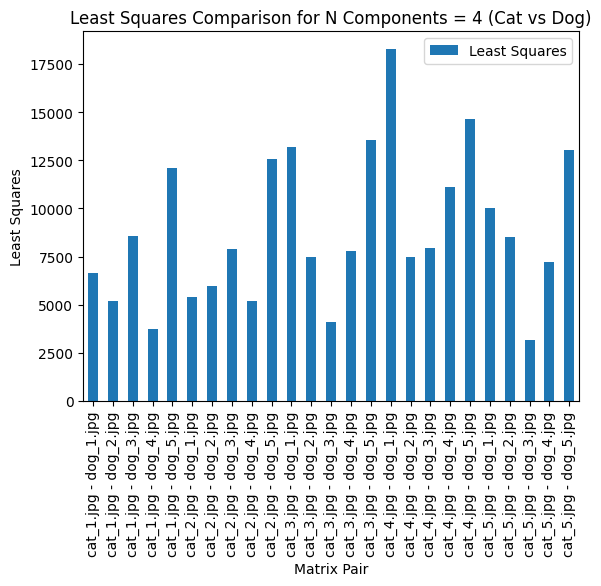

In [8]:
# Filter the dataframe for Matrix A containing 'cat', Matrix B containing 'dog', and N Components = 4
df_cat_dog_n4 = df[(df['Matrix A'].str.contains('cat')) & (df['Matrix B'].str.contains('dog')) & (df['N Components'] == 4)]

# Plot the barplot
plt.figure(figsize=(12, 6))
df_cat_dog_n4.plot(kind='bar', x='Matrix Pair', y='Least Squares')
plt.title('Least Squares Comparison for N Components = 4 (Cat vs Dog)')
plt.xlabel('Matrix Pair')
plt.ylabel('Least Squares')
plt.xticks(rotation=90)
plt.show()